<a href="https://colab.research.google.com/github/Adrok24/classification-of-plant-diseases/blob/main/2_plants_disease_aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from zipfile import ZipFile 
import os
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
#files.download('file.csv')

Mounted at /content/drive


In [2]:
import zipfile
folder = 'drive/My Drive/Plant_leaf_diseases_dataset_without_augmentation.zip'
plants_files_folder = "Plant_leave_diseases_dataset_without_augmentation"
with zipfile.ZipFile(folder,"r") as zip_ref:
    zip_ref.extractall("Plants")

In [3]:
base_dir = './Plants'
os.makedirs(base_dir, exist_ok=True)

In [4]:
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)

validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)

test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

In [5]:
plants_categories = os.listdir('/'.join((base_dir,plants_files_folder)))

# Creamos los directorios para las 39 clases presentes en el dataset
for directory in (train_dir, validation_dir, test_dir):
    for folder_name in plants_categories:
        class_directory = os.path.join(directory, folder_name)
        os.makedirs(class_directory, exist_ok=True)
        

In [6]:
import shutil

for plant_category in plants_categories:
    plants_pictures = os.listdir('/'.join((base_dir,plants_files_folder, plant_category)))

    #Dividimos train 80%, validation 10% y test 10%. 
    train_ds = plants_pictures[:int(len(plants_pictures)*0.8)]
#     validation_ds = plants_pictures[int(len(plants_pictures)*0.8): int(len(plants_pictures)*0.9)]
#     test_ds = plants_pictures[int(len(plants_pictures)*0.8): int(len(plants_pictures)*0.9)]


    #Copio los porcentajes de cada clase en su correspondiente carpeta
    fnames = ['image ({}).JPG'.format(i) for i in range(1,len(train_ds))]
    for fname in fnames:
        try:
            src = os.path.join(base_dir,plants_files_folder, plant_category, fname)
            dst = os.path.join(base_dir,'train',plant_category, fname)
            shutil.copyfile(src, dst)
        except OSError:
            pass

    
    fnames = ['image ({}).JPG'.format(i) for i in range(int(len(plants_pictures)*0.8), int(len(plants_pictures)*0.9))]
    for fname in fnames:
        try:
            src = os.path.join(base_dir,plants_files_folder, plant_category, fname)
            dst = os.path.join(base_dir,'validation',plant_category, fname)
            shutil.copyfile(src, dst)      
        except OSError:
            pass


    fnames = ['image ({}).JPG'.format(i) for i in range(int(len(plants_pictures)*0.9), len(plants_pictures))]
    for fname in fnames:
        try:
            src = os.path.join(base_dir,plants_files_folder, plant_category, fname)
            dst = os.path.join(base_dir,'test',plant_category, fname)
            shutil.copyfile(src, dst)
                
        except OSError:
            pass
        

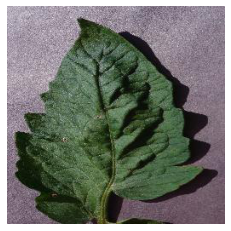

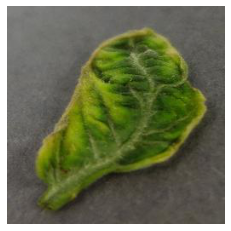

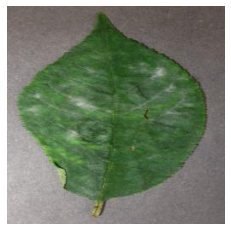

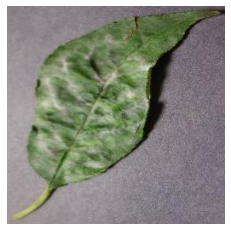

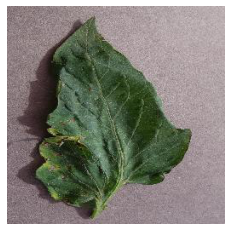

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Este es un módulo con utilidades para preprocesamiento de imágenes
from keras.preprocessing import image

random_plants_dirs = [os.path.join(train_dir, fname)
               for fname in np.random.choice(os.listdir(train_dir), 5)]

random_plants = [os.path.join(plant, np.random.choice(os.listdir(plant) , 1)[0])             
                for plant in random_plants_dirs]

for plant in random_plants:
  plt.imshow(image.load_img(plant))
  plt.axis('off')
  plt.show()  

In [8]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=25,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

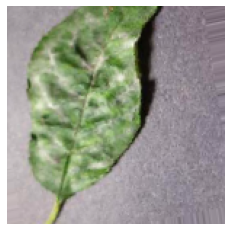

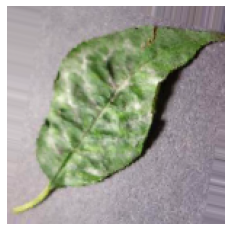

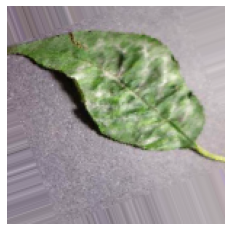

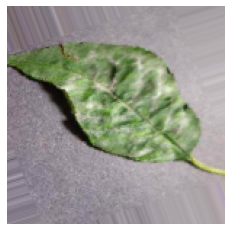

In [9]:
# Elegimos una imagen para "aumentar"
img_path = random_plants[-2]

# La leemos y la reescalamos
img = image.load_img(img_path, target_size=(150, 150))

# La convertimos a un Numpy de forma (150, 150, 3)
x = image.img_to_array(img)

# La reescalamos a (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# El comando .flow() genera batches de imágenes transformadas aleatoriamente
# Usamos un `break` para cortar el loop en algún momento
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    plt.axis('off')
    i += 1
    if i % 4 == 0:
        break

In [10]:
all_plants_dirs = [os.path.join(train_dir, fname)
               for fname in os.listdir(train_dir)]

print(all_plants_dirs)

all_plants_count = np.array([len(os.listdir(plants)) for plants in all_plants_dirs])

all_plants_count

['./Plants/train/Tomato___healthy', './Plants/train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', './Plants/train/Soybean___healthy', './Plants/train/Corn___Northern_Leaf_Blight', './Plants/train/Apple___Cedar_apple_rust', './Plants/train/Apple___Black_rot', './Plants/train/Tomato___Leaf_Mold', './Plants/train/Apple___Apple_scab', './Plants/train/Tomato___Late_blight', './Plants/train/Corn___Common_rust', './Plants/train/Strawberry___healthy', './Plants/train/Grape___Esca_(Black_Measles)', './Plants/train/Grape___healthy', './Plants/train/Corn___healthy', './Plants/train/Peach___Bacterial_spot', './Plants/train/Blueberry___healthy', './Plants/train/Cherry___Powdery_mildew', './Plants/train/Pepper,_bell___healthy', './Plants/train/Tomato___Spider_mites Two-spotted_spider_mite', './Plants/train/Tomato___Tomato_mosaic_virus', './Plants/train/Raspberry___healthy', './Plants/train/Tomato___Septoria_leaf_spot', './Plants/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus', './Plants/train/Orange___

array([1270,  859, 4071,  707,  219,  495,  760,  503, 1405,  952,  363,
       1105,  337,   17, 1836, 1200,  840, 1180, 1339,  297,  295, 1415,
       4284, 4404,  358,  886, 1700,  799, 1449,  943, 1315,  796,  799,
        682,  287, 1122,  120,    0,  799])

In [11]:
class_weights1 = {k:v for k,v in zip(range(len(all_plants_count)), all_plants_count.sum() / all_plants_count / 5000 )}
class_weights1[36] = 0

class_weights1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


{0: 0.0066469291338582676,
 1: 0.009827240977881258,
 2: 0.002073593711618767,
 3: 0.01194002828854314,
 4: 0.03854611872146119,
 5: 0.017053737373737374,
 6: 0.011107368421052631,
 7: 0.016782504970178927,
 8: 0.006008256227758008,
 9: 0.008867226890756303,
 10: 0.02325509641873278,
 11: 0.00763945701357466,
 12: 0.025049258160237387,
 13: 0.49656470588235296,
 14: 0.004597821350762527,
 15: 0.0070346666666666665,
 16: 0.010049523809523809,
 17: 0.007153898305084746,
 18: 0.006304406273338312,
 19: 0.028422895622895624,
 20: 0.028615593220338985,
 21: 0.005965795053003533,
 22: 0.001970494864612512,
 23: 0.001916802906448683,
 24: 0.023579888268156424,
 25: 0.009527765237020315,
 26: 0.0049656470588235295,
 27: 0.01056520650813517,
 28: 0.005825810904071773,
 29: 0.00895185577942736,
 30: 0.006419467680608365,
 31: 0.010605025125628142,
 32: 0.01056520650813517,
 33: 0.012377712609970675,
 34: 0.029413240418118464,
 35: 0.007523707664884135,
 36: 0,
 37: inf,
 38: 0.01056520650813517}

In [12]:
a = 0
for key in class_weights1:
    a +=  class_weights1[key]

a

inf

In [13]:
class_weights = {k:v for k,v in zip(range(len(all_plants_count)), all_plants_count / all_plants_count.sum() )}
class_weights

{0: 0.030089082638362397,
 1: 0.020351592115238817,
 2: 0.09645090978013647,
 3: 0.016750379075056863,
 4: 0.005188589840788476,
 5: 0.011727634571645185,
 6: 0.01800606520090978,
 7: 0.011917172100075816,
 8: 0.033287528430629265,
 9: 0.022554965883244883,
 10: 0.008600265352539802,
 11: 0.02617987111448067,
 12: 0.007984268385140257,
 13: 0.00040276724791508717,
 14: 0.043498862774829415,
 15: 0.02843062926459439,
 16: 0.01990144048521607,
 17: 0.027956785443517818,
 18: 0.031723843821076576,
 19: 0.007036580742987112,
 20: 0.006989196360879454,
 21: 0.03352445034116755,
 22: 0.10149734647460197,
 23: 0.10434040940106142,
 24: 0.00848180439727066,
 25: 0.02099128127369219,
 26: 0.04027672479150872,
 27: 0.018930060652009098,
 28: 0.03432998483699773,
 29: 0.022341736163760426,
 30: 0.031155231235784685,
 31: 0.01885898407884761,
 32: 0.018930060652009098,
 33: 0.016158074298711144,
 34: 0.006799658832448825,
 35: 0.026582638362395754,
 36: 0.002843062926459439,
 37: 0.0,
 38: 0.01893

In [14]:
from keras.preprocessing.image import ImageDataGenerator

# Reescalamos todas las imágenes en un factor de 1./255
train_datagen = ImageDataGenerator(
      rotation_range=25,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# La función flow_from_directory() toma el path a un directorio
# y genera batches de data a la que aplica las transformaciones definidas
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        shuffle=False,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        shuffle=False,
        class_mode='categorical')

Found 42208 images belonging to 39 classes.
Found 5272 images belonging to 39 classes.


In [15]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(39, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [22]:
from sklearn.utils import class_weight
import numpy as np
print(len(np.unique(train_generator.classes)))
class_weights = class_weight.compute_class_weight(
          'balanced',
           np.unique(train_generator.classes), 
           train_generator.classes)

print(len(class_weights))
class_weights = {i : class_weights[i] for i in range(0,38)}
#README este metodo compute_class_weight me devuelve una clase menos

38
38


In [23]:
class_weights

{0: 2.2082243381814375,
 1: 2.243912812333865,
 2: 5.071857726508051,
 3: 0.844666800080048,
 4: 0.9256140350877193,
 5: 1.3223057644110277,
 6: 1.628646396048773,
 7: 3.102616877389003,
 8: 1.1667403803626715,
 9: 1.5710563537556763,
 10: 65.3374613003096,
 11: 1.1778757604509684,
 12: 1.0051917123124554,
 13: 1.2930580234054285,
 14: 3.295955021083867,
 15: 0.25221090874324775,
 16: 0.6049764935213852,
 17: 3.8701632129103247,
 18: 1.395398042845808,
 19: 0.9413024085637823,
 20: 1.390158751070417,
 21: 1.390158751070417,
 22: 9.256140350877192,
 23: 3.7652096342551293,
 24: 0.27284127784457457,
 25: 0.7665540663252334,
 26: 1.253653320660568,
 27: 3.0598811077279975,
 28: 0.653374613003096,
 29: 1.390158751070417,
 30: 0.7905600299681589,
 31: 1.4614958448753463,
 32: 0.7849730332899386,
 33: 0.8295271412287253,
 34: 0.9899615348531757,
 35: 0.2592756400805936,
 36: 3.7398546872231084,
 37: 0.8745959386655615}

In [17]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [24]:
spe = 42000 / 20
history = model.fit_generator(train_generator,
                              steps_per_epoch=spe,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=100,
                              class_weight=class_weights)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
  50/2100 [..............................] - ETA: 32:09 - loss: 14.1344 - accuracy: 0.0200

InvalidArgumentError: ignored

In [ ]:
model.save('drive/My Drive/plans_disease_1.h5')

Found 5288 images belonging to 39 classes.
39
Instructions for updating:
Please use Model.evaluate, which supports generators.
Accuracy en test: 0.79
Instructions for updating:
Please use Model.predict, which supports generators.
Confusion Matrix
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Background_without_leaves', 'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Cherry___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry_

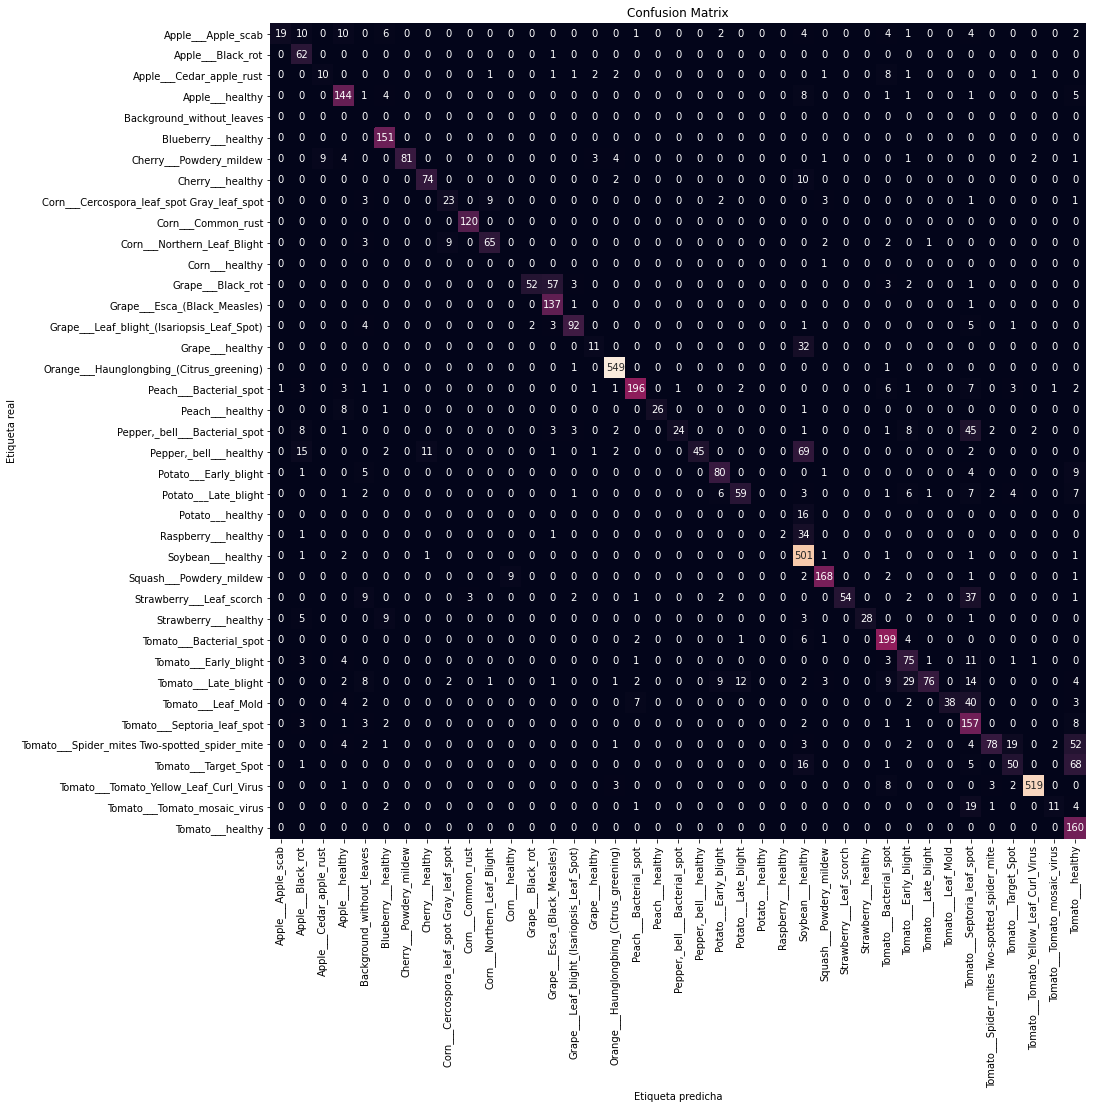

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical',
        shuffle=False)


labels = validation_generator.class_indices
labels = dict((v,k) for k,v in labels.items())
tick_labels = list(labels.values())
print(len(tick_labels))
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('Accuracy en test:', np.round(test_acc, 2))

Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)

print(tick_labels)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt='.0f', square=True,
             xticklabels=tick_labels, yticklabels=tick_labels,
             cbar=False)
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.title('Confusion Matrix')
plt.show()




In [ ]:
# # Classification report
len(tick_labels)
print('\nClassification Report:\n')
print(classification_report(test_generator.classes, y_pred, target_names=tick_labels, digits = 6, labels=range(len(tick_labels))))


Classification Report:

                                               precision    recall  f1-score   support

                           Apple___Apple_scab   0.950000  0.301587  0.457831        63
                            Apple___Black_rot   0.548673  0.984127  0.704545        63
                     Apple___Cedar_apple_rust   0.526316  0.357143  0.425532        28
                              Apple___healthy   0.761905  0.872727  0.813559       165
                    Background_without_leaves   0.000000  0.000000  0.000000         0
                          Blueberry___healthy   0.843575  1.000000  0.915152       151
                      Cherry___Powdery_mildew   1.000000  0.764151  0.866310       106
                             Cherry___healthy   0.860465  0.860465  0.860465        86
   Corn___Cercospora_leaf_spot Gray_leaf_spot   0.676471  0.547619  0.605263        42
                           Corn___Common_rust   0.975610  1.000000  0.987654       120
                 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


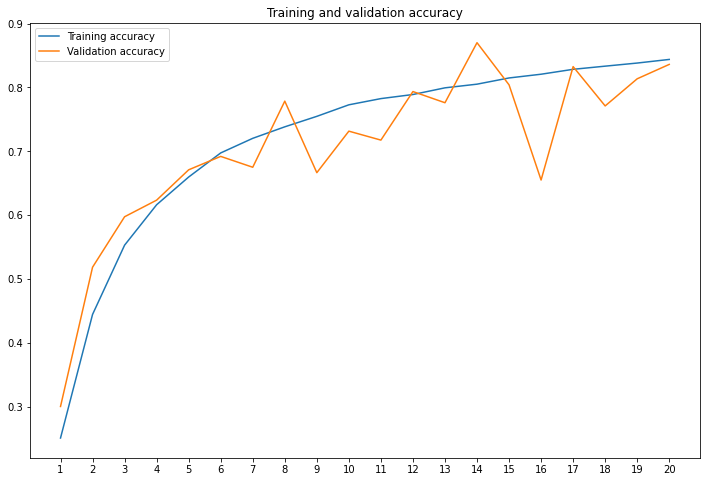

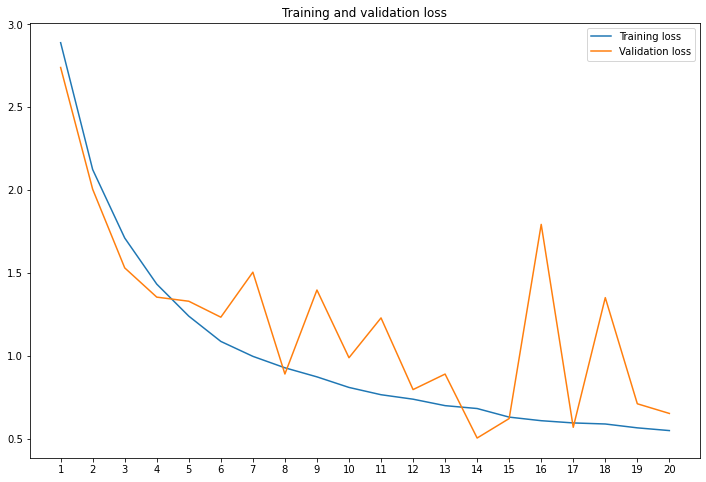

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,8))
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.xticks(ticks=epochs)
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(12,8))
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.xticks(ticks=epochs)
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt